In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

C:\Users\rhoda\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## import dataframe 

In [34]:
df_users = pd.read_csv(r"D:\Springboard\Github\relax_take home challenge\takehome_users.csv",encoding='ISO-8859-1')
df_engage = pd.read_csv(r'D:\Springboard\Github\relax_take home challenge\takehome_user_engagement.csv',encoding='ISO-8859-1')

## Dataset introduction 

#### A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years. 

This table includes:
- name: the user's name
- object_id: the user's id
- email: email address
- creation_source: how their account was created. This takes on one of 5 values:
    ○ PERSONAL_PROJECTS: invited to join another user's personal workspace
    ○ GUEST_INVITE: invited to an organization as a guest(limited permissions)
    ○ ORG_INVITE: invited to an organization (as a full member)
    ○ SIGNUP: signed up via the website
    ○ SIGNUP_GOOGLE_AUTH: signed up using Google. Authentication (using a Google email account for their login id)
- creation_time: when they created their account
- last_session_creation_time: unix timestamp of last login
- opted_in_to_mailing_list: whether they have opted into receiving marketing emails
- enabled_for_marketing_drip: whether they are on the regular marketing email drip
- org_id: the organization (group of users) they belong to
- invited_by_user_id: which user invited them to join (if applicable).  

#### A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period , identify which factors predict future user adoption .



In [35]:
# Understand dataset 
df_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [31]:
# Understand dataset 
df_engage

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [32]:
df_engage['user_id'].value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
6763       1
3773       1
5822       1
10040      1
2047       1
Name: user_id, Length: 8823, dtype: int64

#### Define Adopted Users
Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period, identify which factors predict future user adoption.

In [33]:
# first get all user ids
users = set(df_engage['user_id'])
adopted_user = []

# iterate all users & check whether they are 'adopted user' using panda's API 'rolling'
for i, user in enumerate(users):
    df_user = df_engage[df_engage.user_id == user]
    df_user = df_user[['time_stamp', 'user_id']]
    df_user['time_stamp'] = pd.to_datetime(df_user['time_stamp'])
    df_user = df_user.set_index('time_stamp')
    df_user['at_least_3_days_over_7_days_period'] = df_user.rolling(window = '7D').count()
    
    if max(df_user['at_least_3_days_over_7_days_period']) >= 3:
        adopted_user.append(user)
        
print(len(adopted_user) / len(users) * 100)

18.157089425365523


In [36]:
# There are 12000 rows and 10 columns in the  takehome_users dataset 
df_users.shape 

(12000, 10)

In [37]:
# There are 207917 rows and 3 columns in the takehome_user_engagement dataset. 
df_engage.shape 

(207917, 3)

### Identify Factors that Predict Future User Adoption

In [38]:
# Map the adopted user information back to the user data frame as 'is_adopted_user'.
df_users['is_adopted_user'] = df_users['object_id'].apply(lambda x: x in adopted_user)
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [39]:
# select features/target.
# remove name as in terms of privacy it should NOT be a feature.
df_users = df_users[['creation_time', 'email', 'creation_source', 'last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'is_adopted_user',]]
df_users.head()

,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,is_adopted_user
0,2014-04-22 03:53:30,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,False
1,2013-11-15 03:45:04,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,True
2,2013-03-19 23:14:52,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,False
3,2013-05-21 08:09:28,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,False
4,2013-01-17 10:14:20,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,False


In [40]:
# Inspect data types & fix them
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   email                       12000 non-null  object 
 2   creation_source             12000 non-null  object 
 3   last_session_creation_time  8823 non-null   float64
 4   opted_in_to_mailing_list    12000 non-null  int64  
 5   enabled_for_marketing_drip  12000 non-null  int64  
 6   org_id                      12000 non-null  int64  
 7   is_adopted_user             12000 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 668.1+ KB


In [41]:
# Transform creation_time to datatime obj.
df_users['creation_time'] = pd.to_datetime(df_users['creation_time'])
df_user.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2014-01-26 08:57:12 to 2014-01-26 08:57:12
Data columns (total 2 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   user_id                             1 non-null      int64  
 1   at_least_3_days_over_7_days_period  1 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 24.0 bytes


C:\Users\rhoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                     is_adopted_user
creation_time                       
2014-04-22 03:53:30              0.0
2013-11-15 03:45:04              1.0
2013-03-19 23:14:52              0.0
2013-05-21 08:09:28              0.0
2013-01-17 10:14:20              0.0


<AxesSubplot:xlabel='creation_time'>

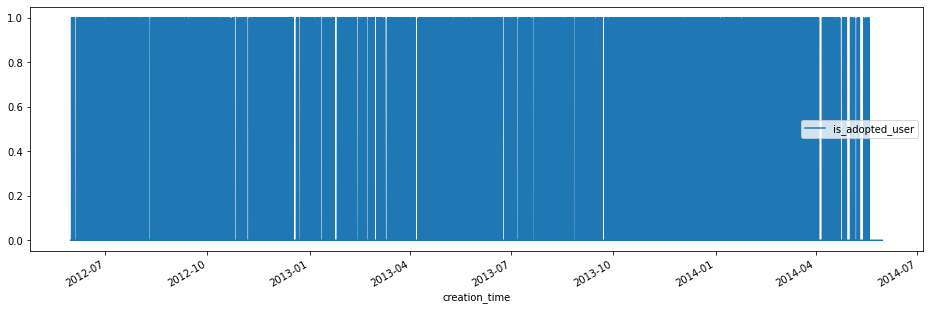

In [42]:
# Not sure if creation_time correlates adopted user. Let's quickly plot it to visualize it.
df_creation_time_vs_is_adopted_user = df_users[['creation_time', 'is_adopted_user']]
df_creation_time_vs_is_adopted_user = df_creation_time_vs_is_adopted_user.set_index('creation_time')
df_creation_time_vs_is_adopted_user['is_adopted_user'] = df_creation_time_vs_is_adopted_user['is_adopted_user'].astype(float)
print(df_creation_time_vs_is_adopted_user.head())

df_creation_time_vs_is_adopted_user.plot(figsize = (16, 5))

## Data Exploration  

In [14]:
# the variable of creation_source

df['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

<AxesSubplot:>

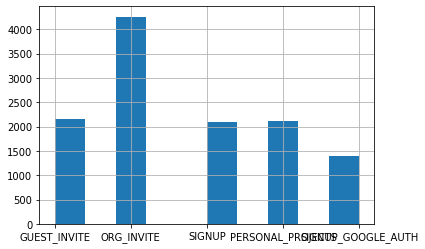

In [15]:
df['creation_source'].hist()

In [16]:
# opted_in_to_mailing_list

df['opted_in_to_mailing_list'].value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

<AxesSubplot:>

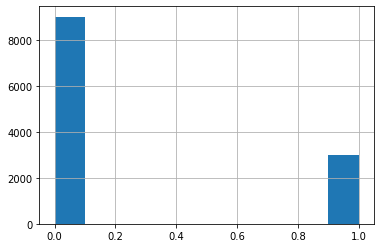

In [17]:
df['opted_in_to_mailing_list'].hist()

In [18]:
# enabled_for_marketing_drip

df['enabled_for_marketing_drip'].value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

<AxesSubplot:>

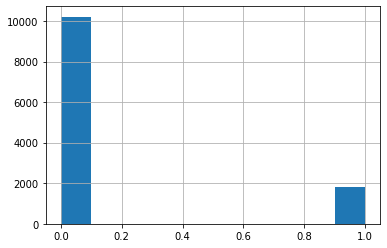

In [19]:
df['enabled_for_marketing_drip'].hist()

In [20]:
# Defining an "adopted user"



In [21]:
df_1

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [22]:
i = 0 
for j in set(df_1['user_id']):
    i += 1
print(i)

8823
